In [1]:
# Basic Python Packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import math

# Packages for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# packages for model evaluation
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer

#Packages for Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Setup: Import the Dataset

In [2]:
telcom = pd.read_csv("TelcoCus.csv")
telcom_df = telcom.copy()
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### The imported dataset, "TelcoCus" has 7043 customer details and 21 variables 
    The variables include gender, Partner, Dependents, PhoneService, SeniorCitizen, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn, tenure, Monthly Charges.

In [3]:
telcom.shape

(7043, 21)

# Data Cleaning

In [4]:
telcom.drop(columns='customerID', inplace=True)
telcom

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## The variable 'CustomerID' is dropped from the dataset as it would not be useful in churn prediction and preparing models for our Project. 

In [5]:
# make all column names lowercase
telcom.columns = map(str.lower, telcom.columns)
telcom.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
#change senior citizen data type to object
telcom.seniorcitizen = telcom.seniorcitizen.astype('object')

# 1. Exploratory Data Analysis

In [7]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [8]:
telcom_duplicates = telcom[telcom.duplicated()]
telcom_duplicates.shape

(22, 20)

## From this we can conclude there are no duplicates and null values in the dataset. 

In [9]:
telcom.describe()

,tenure,monthlycharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


## Uniqueness of the values

In [10]:
#Print number of rows in DF
print(f"Rows: {telcom.shape[0]} \n")
#Print number of features in DF
print(f"Features: {telcom.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {telcom.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {telcom.nunique()} \n")


Rows: 7043 

Features: 20 

Missing Values: 0 

Unique Values: gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



    The above information gives us details about the number of unique values that each variable has. This is helpful in determining whether the cardinality is useful, as variables with high cardinality could affect the Performance of our model as thhe model would otherwise have too many variables which hinders its ability to predict accurate values. 

# TotalCharges 
       Change in data type and fill in emply values.

In [11]:
TotalCharges_missing = telcom[ pd.to_numeric(telcom['totalcharges'], errors='coerce').isnull()]
TotalCharges_missing

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### This allows us to check that if any customer with a tenure of 0 months, their total charges is output is empty and not 0. 

telcom['total_services_opted'] = (telcom[['phoneservice','multiplelines',
                                        'internetservice','onlinesecurity',
                                        'onlinebackup','deviceprotection',
                                        'techsupport','streamingtv',
                                        'streamingmovies']] == "Yes").sum(axis = 1)

### Sort in ascending order by Tenure. 

In [12]:
telcom.loc[:,['contract','tenure', 'monthlycharges', 'totalcharges']].sort_values(by=['tenure'])

,contract,tenure,monthlycharges,totalcharges
1340,Two year,0,56.05,
936,Two year,0,80.85,
6670,Two year,0,73.35,
4380,Two year,0,20.00,
5218,One year,0,19.70,
...,...,...,...,...
914,Two year,72,25.20,1798.9
917,Two year,72,65.55,4807.45
4574,One year,72,105.75,7629.85
3635,Two year,72,24.55,1750.7


In [13]:
print("Count of Missing Values in TotalCharges is",TotalCharges_missing.shape[0])

# the following are the index numbers of the rows with missing values
TotalCharges_missing.index

Count of Missing Values in TotalCharges is 11


Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
for count in TotalCharges_missing.index:
  telcom.loc[count,'totalcharges'] = telcom.loc[count]['tenure'] * telcom.loc[count]['monthlycharges']

In [15]:
# Replace all missing string values with 0
telcom.totalcharges = telcom.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
telcom.totalcharges = telcom.totalcharges.astype('float32')

    The missing values of Total Charges are being filled with the correct value. 

In [16]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [17]:
telcom.to_csv("cleanedTelco.csv",index = False)

### Exported dataset with data preparation and cleaning done for classification and clustering notebook use

# 1.1 Churn Evaluation

In [18]:
telcom.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

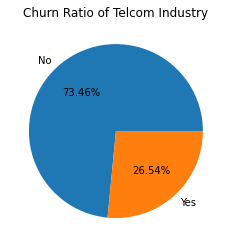

In [19]:
plt.figure(figsize=(6, 4))
plt.pie(telcom.churn.value_counts()/telcom.shape[0], labels = telcom.churn.unique(), autopct='%1.2f%%')
plt.title("Churn Ratio of Telcom Industry")
plt.show()

# Churn Rate
   26.54% of the customers registered in the telco company are churning which means they are moving out of this telcom company service. It can be observed that majority or the customers do not churn but using this project model we aim to predict whether prospective customers would churn and strategies to retain/ retract them back in this company. 

# 1.2 Create lists for Categorical and Numerical data

In [20]:
# creating separate lists for categorical and numerical features

categorical_features = []
numerical_features = []

for feature in telcom.columns:
  if telcom[feature].dtype == 'O':
    categorical_features.append(feature)
  else:
    numerical_features.append(feature)
    
categorical_features

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

# 2. Categorical Variables Analysis

In [21]:
def count_percentage_subplots(features_list, rows, cols, huee, dataa, x_ticks_rotation = 0, figsize_row = 14, figsize_col = 9 , prcnt_color = 'white', prcnt_height = -100 ):
  fig = plt.figure(figsize = (figsize_row, figsize_col))
  ax_list = []
  for i in range(1,cols * rows+1):
    ax_list.append("ax"+str(i))
  for index,ax_name in enumerate(ax_list): # for features 
    ax_name = plt.subplot(rows, cols, index+1)
    feature = features_list[index]
    sb.countplot(x=feature , hue = huee, data= dataa, order = sorted(list(dataa[feature].unique())))
    plt.xticks(rotation= x_ticks_rotation)
    for index,p in enumerate(ax_name.patches):
      height = p.get_height()
      temp = list(round(dataa.groupby(huee)[feature].value_counts(sort = False)/len(dataa)*100,2))
      ax_name.text(p.get_x()+p.get_width()/2., height+prcnt_height, str(temp[index]) + "%", horizontalalignment='center', fontsize=11, color=prcnt_color, weight = 'heavy') 
      
  fig. tight_layout(pad=4.0)
  plt.show()

## 2.1 Demographics

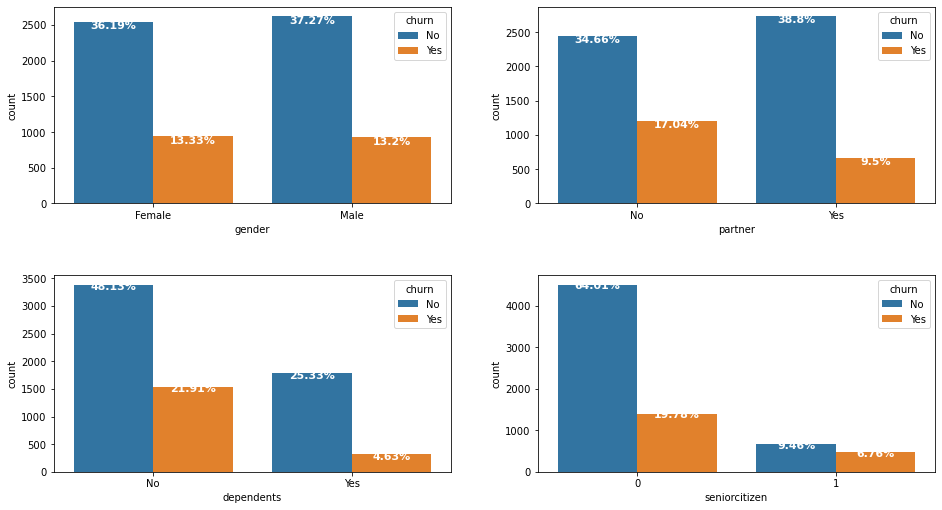

In [22]:
count_percentage_subplots(['gender', 'partner', 'dependents', 'seniorcitizen'],2,2, "churn", telcom, figsize_row = 14, figsize_col = 8 )

# Observations: 
    1. The male to female ratio is roughly equal which shows that the churn rate isnt largely affected by the gender of the customers and can be potentially removed from factors affecting churn. 
    2. Customers who dont have a dependent and no partner are more likely to churn and thus are important factors affecting churn rate. 
    3. More customers who aren't senior citizens are more likely to churn as compared to those who are senior citizens and thus non-senior citizens impact the churn rate. 
    

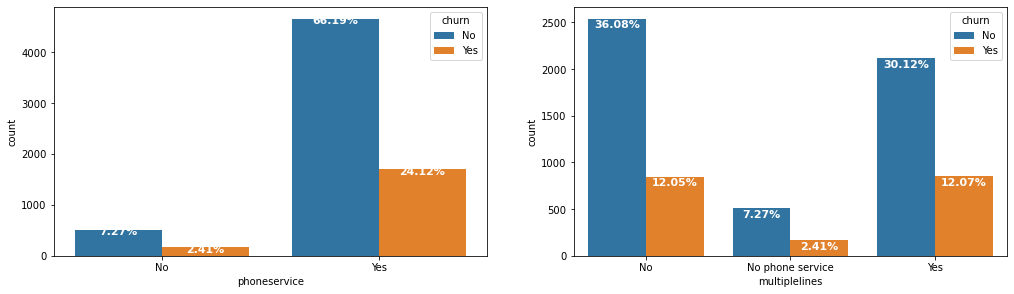

In [23]:
count_percentage_subplots(['phoneservice','multiplelines'],1,2, "churn", telcom, figsize_row = 15, figsize_col = 5 )

    Customers with multiple lines churn at approximately the same rate as those with a singular line
    Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone 
    lines
    
    Customers who have and dont have a phone service and multiple lines aren't likely to churn and so this 
    isn't a good factor to determine the churn rate as the results don't provide solid evidence. This data 
    shows that those with a phone service and those without a service have the ratio of churn and not churn to 
    be almost the same. 

## 2.2 Internet Service

In [24]:
def plot_internet_services(telcom):
    
    copy = telcom.copy()
    fig = plt.figure(figsize = (30, 10))

    plt.subplot(131)
    plt.pie(copy.internetservice.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
    plt.title('Internet Service Composition of Customers', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    copy = copy.groupby('internetservice')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(telcom)) * 100
    d = sb.barplot('internetservice', y = 'pct_total', hue = 'churn', data = copy)
    d.set_title('% Churn by Internet Service', fontweight= 'bold', fontsize = 30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    d.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    
    plt.subplot(133)
    e = sb.violinplot('internetservice', 'monthlycharges', 'churn', telcom, split = True)
    e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight = 'bold', fontsize = 30)
    e.set_xlabel('')
    e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    e.set_ylabel('Monthly Charges($)', fontweight = 'bold', fontsize = 30)

    fig.tight_layout()
    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


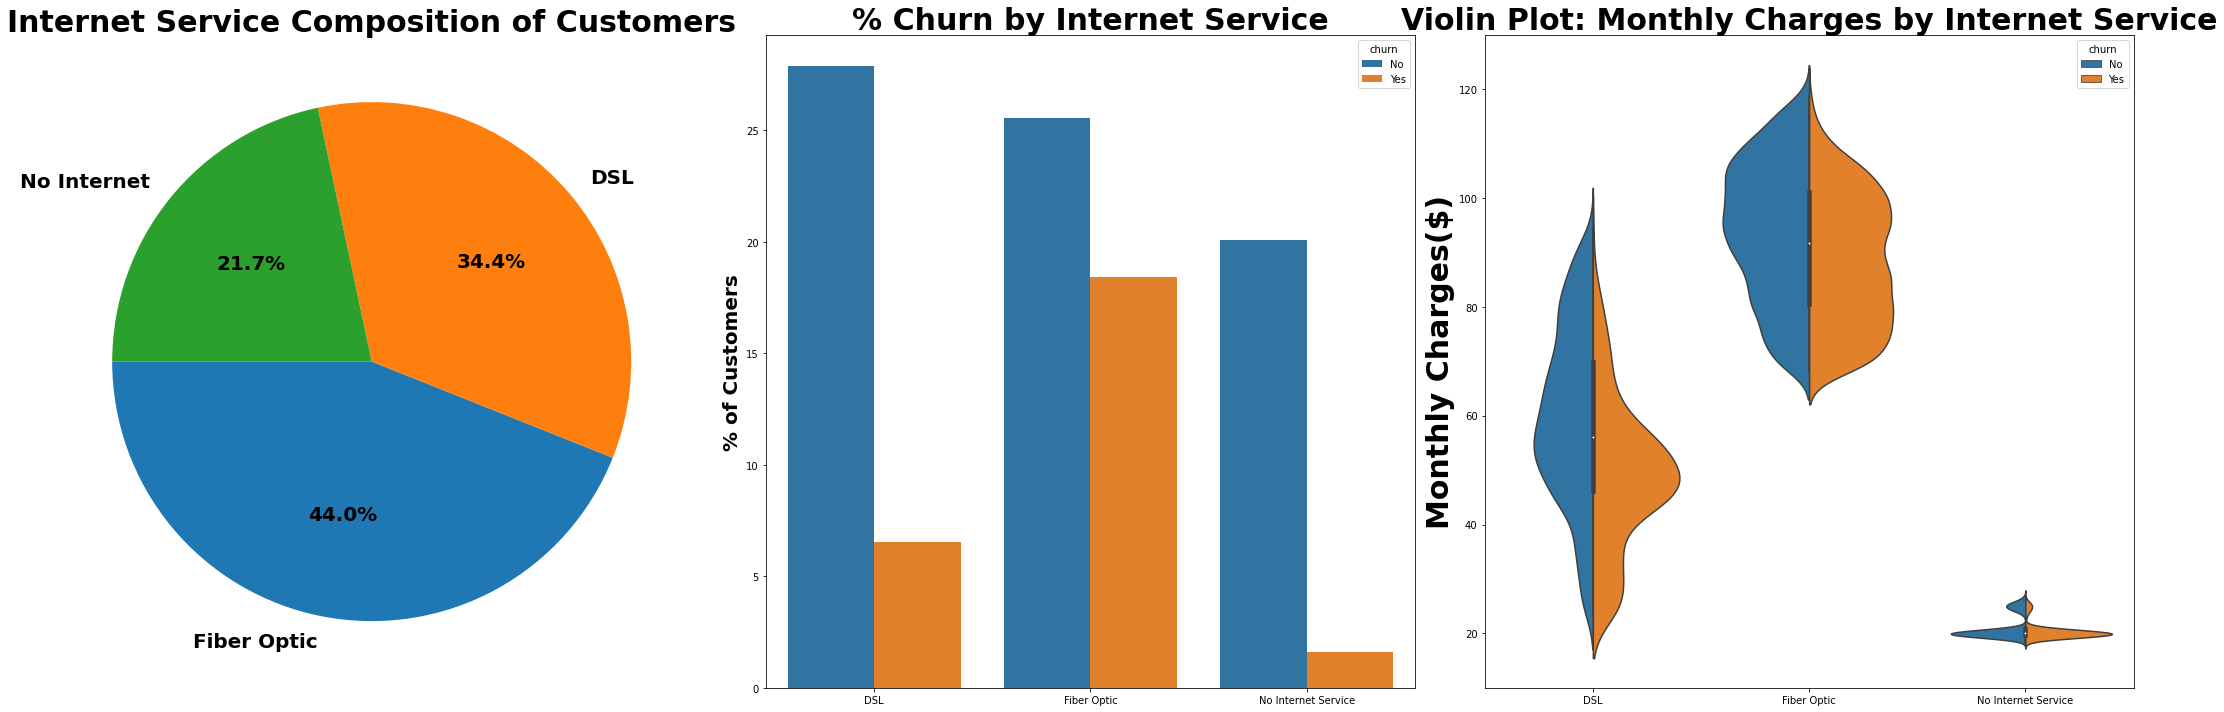

In [25]:
plot_internet_services(telcom)

# Observations

    Those with a Fiber Optic Service are more likely to churn as compared to those with other internet services 
    or no internet services. However majority of those with any type of internet services generally don't 
    churn. 

## 2.3 Add-on Services

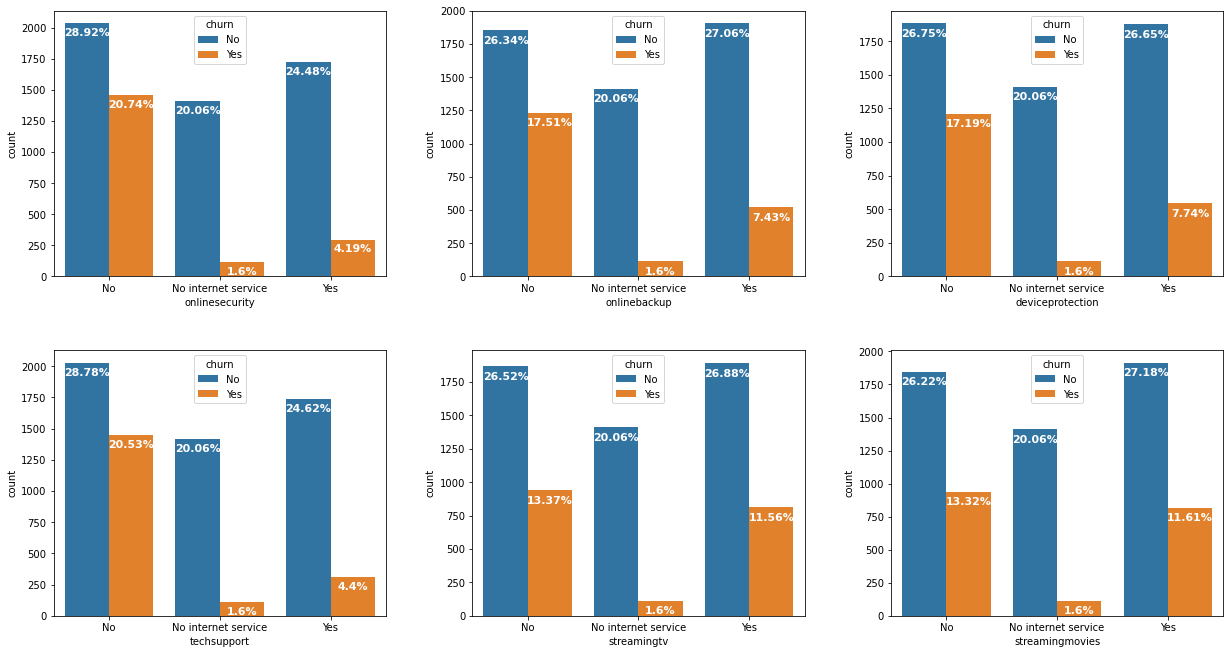

In [26]:
count_percentage_subplots(['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies'],
                         2,3, "churn", telcom, figsize_row = 18, figsize_col = 10 )

# Customers who have an internet service but not the following services are more likely to churn. 

    1. Online Security
    2. Online Backup
    3. Device Protection
    4. TechSupport
    
### Customers with Streaming Service (TV/Movies) churn the most

# 2.5 Contract Type

In [27]:
def plot_contracts(telcom):
    
    copy = telcom.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('contract')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(telcom)) * 100
    a = sb.barplot('contract', y = 'pct_total', hue = 'churn', data = copy)
    a.set_title('% Churn - Contract Type', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sb.violinplot('contract', 'monthlycharges', 'churn', telcom, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    b.legend(loc = 'upper left')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


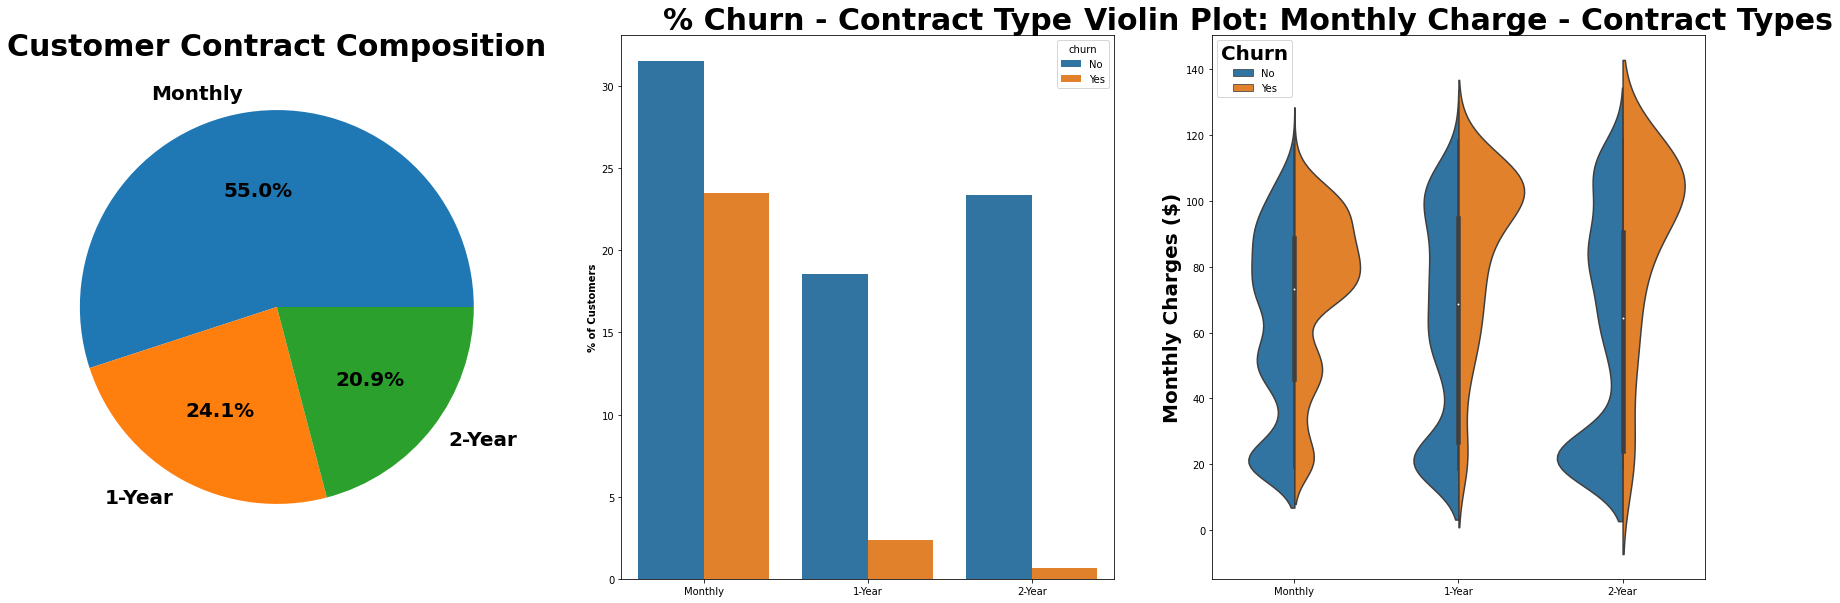

In [28]:
plot_contracts(telcom)

    The contract type that is a monthly, one year or two contract affects the churn to a great extent. It is observed that significantly more customers churn when on monthly contracts , where on average they spend more than $60/month which potentially means customers aren’t satisfied with the product and the money they spend on it. As the contract lengths increase, the churn decreases showing that telcos should aim to get customers to get longer contracts. 

# 2.6 Billing Type

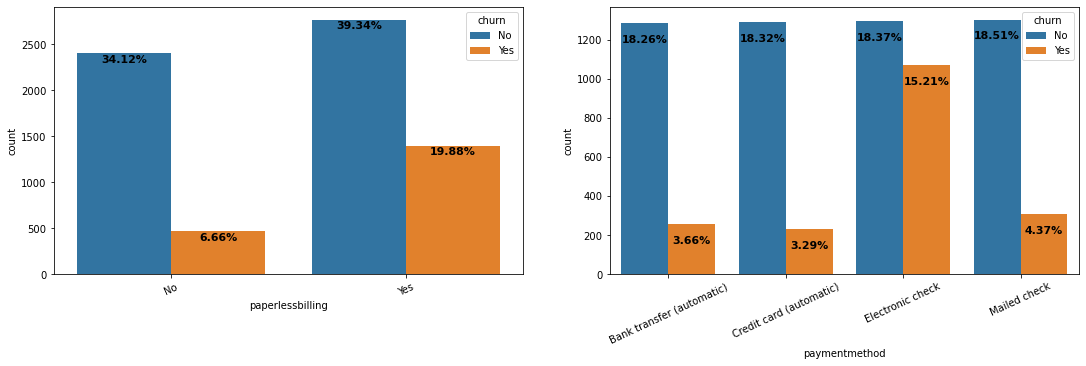

In [29]:
count_percentage_subplots(['paperlessbilling','paymentmethod'],1,2, "churn", telcom, figsize_row =16 , figsize_col = 6 ,x_ticks_rotation = 25,prcnt_color = 'black')

# Conclusions
    1. Customers with a month to month type of contract have highest churn %. The probability of    
    churning v/s not churning is the lowest in month-to-month as compared to other contract types. 
    
    2. Customers paying with electronic check have the highest churn %,this may give an explaination as to 
    why the churn rate for those who opted for PaperlessBilling is high. As Electroniccheck, credit card and 
    bank transfer are all paperless methods. 

# 3. Numerical Variables Analysis 

In [30]:
def plot_kde(telcom, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sb.kdeplot(telcom[telcom.churn == 'No'][feature].dropna(), label = 'No Churn')
    ax1 = sb.kdeplot(telcom[telcom.churn == 'Yes'][feature].dropna(), label = 'Churn')
    legend=True
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

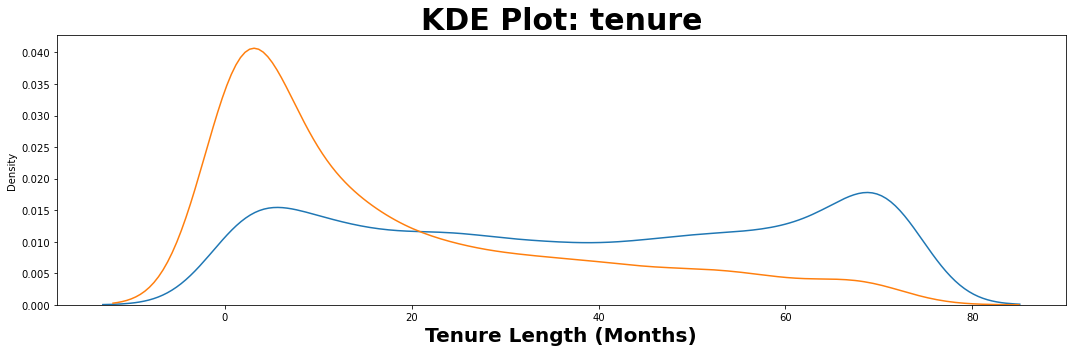

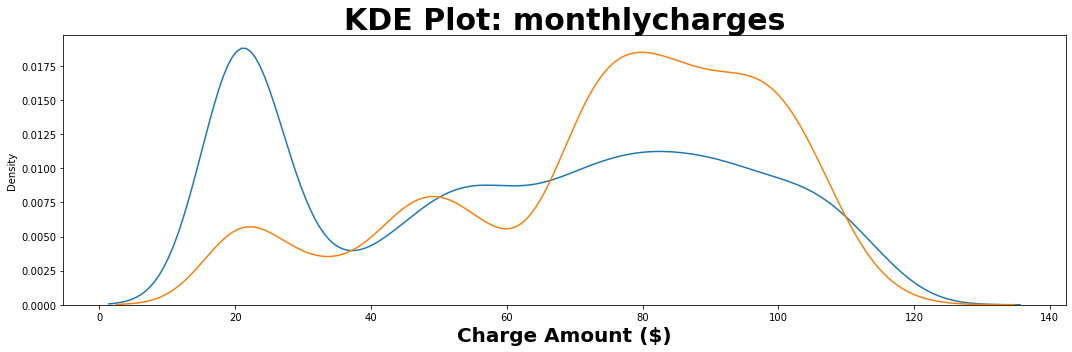

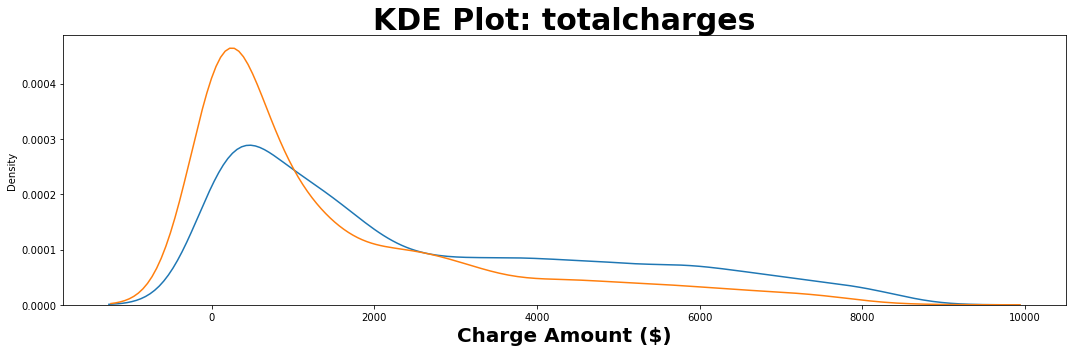

In [31]:
plot_kde(telcom, 'tenure')
plot_kde(telcom, 'monthlycharges')
plot_kde(telcom, 'totalcharges')

# Observations
    1. People with a shorter tenure are more likely to churn which shows that newer customers may not be 
    satisified with the services/ face some issues. so as tenure increases, the churn probability of churn decreases. 
    
    2. Higher monthly charges leads to higher churn as thus it is a factor that greatly affects churn rate.
    
    3. Lower the total charge, higher the churn, so if any of the other factors change, the total charge will 
    change and thus the churn will change. (Total charge = monthly charges * tenure)

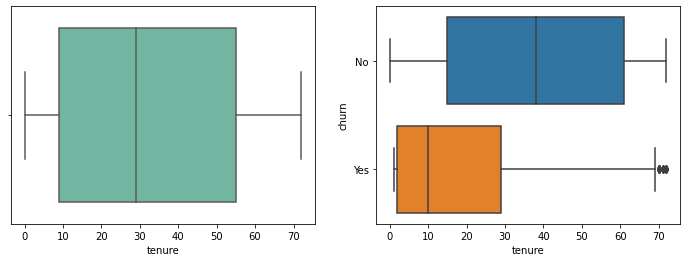

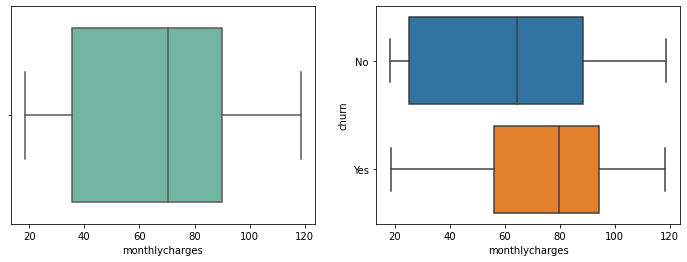

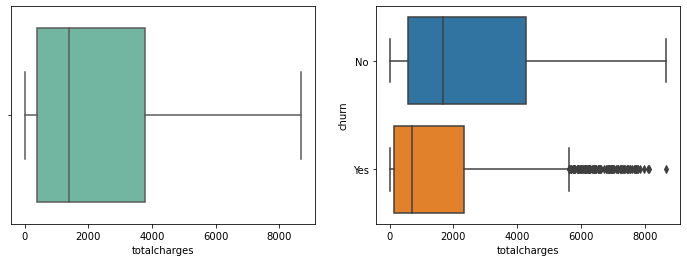

In [32]:
for feature in numerical_features:
  fig, axes = plt.subplots(1,2,figsize=(12,4))
  sb.boxplot(x = feature , data = telcom, ax=axes[0], palette="Set2")
  sb.boxplot(x = feature , data = telcom, y = 'churn',ax=axes[1])
  plt.show()
  print("\n")

# Observations
    1. There are No outliers in the plot of the numerical variables, but in the plot of those with who churn, 
    there are many outliers especially in the totalCharges plot suggesting higher totalCharges do lead to 
    higher churn. 
    2. Churn customer have a very short tenure
    3. The median monthly charges are greater for churn customers compared to non-churn customers
    4. Churn customers have less total charges, but higher monthlyCharge, and less tenure. 